First load needed  libraries: In addition to Pandas,Numpy and Matplolib there will be a need to load Pandas web data reader to grab the data from Google Finance and sklearn for the linear regression calculation.

In [6]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Show Price at market openning vs flunctuations (Ticks)

In [10]:
Solar_Winds = web.DataReader('SWI', data_source = 'google', start = '3/27/2007', end = '3/27/2017')
Solar_Winds = Solar_Winds.drop('Volume', axis = 1 )
#Adding Market openning price vs ticks
Solar_Winds['Ticks'] = range(0,len(Solar_Winds.index.values))
Solar_Winds.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2009-05-20,15.00,15.16,13.55,13.75,0
2009-05-21,14.21,14.39,13.60,13.79,1
2009-05-22,14.00,14.09,13.25,13.29,2
2009-05-26,13.18,13.85,12.70,13.60,3
2009-05-27,13.89,13.89,13.30,13.75,4


In [12]:
#Shows how many rows are there in this 10 year worth dataset
Solar_Winds.shape

(1690, 5)

Basic plot: Ticks vs Open Price 

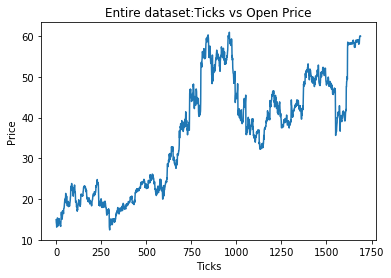

In [16]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Entire dataset:Ticks vs Open Price')
ax1.plot('Ticks', 'Open', data = Solar_Winds);

Table showing a sample of the dataset (1/10)

In [17]:
one_tenth = Solar_Winds.sample(frac = .1, random_state=np.random.randint(10))

# removing index name (1st row,date row) and ordering data in asc.
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,Open,High,Low,Close,Ticks
2009-05-28,13.97,14.66,13.42,14.52,5
2009-05-29,14.74,15.35,14.50,15.00,6
2009-06-03,14.05,15.15,14.05,14.85,9
2009-06-10,14.70,14.93,14.14,14.92,14
2009-06-16,14.20,14.29,13.83,14.07,18


Same basic plot from sample data

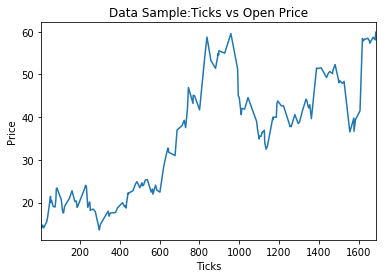

In [18]:
axes = one_tenth.plot('Ticks', 'Open', legend = False, title = 'Data Sample:Ticks vs Open Price');
axes.legend = None;
axes.set_ylabel('Price');

Plot entire dataset and compare with 1/10 sampled data. 

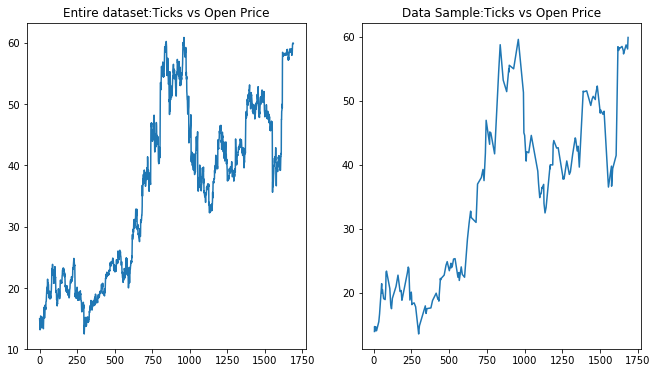

In [23]:
#subplots creates more than one plot in order to compare them
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (11,6));
axes[0].plot('Ticks', 'Open', data = Solar_Winds);
axes[0].set_title('Entire dataset:Ticks vs Open Price');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Data Sample:Ticks vs Open Price');

Change From Date to Ticks

In [24]:
#change index and remove index
Solar_Winds = Solar_Winds.reset_index()
Solar_Winds.head(5)

,Date,Open,High,Low,Close,Ticks
0,2009-05-20,15.00,15.16,13.55,13.75,0
1,2009-05-21,14.21,14.39,13.60,13.79,1
2,2009-05-22,14.00,14.09,13.25,13.29,2
3,2009-05-26,13.18,13.85,12.70,13.60,3
4,2009-05-27,13.89,13.89,13.30,13.75,4


Plot: Entire dataset vs. Sampled Data vs. Rolling Means

In [25]:
# documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
Solar_Winds['Rolling_Mean'] = Solar_Winds['Open'].rolling(window = 80).mean()
Solar_Winds.head(5)

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
0,2009-05-20,15.00,15.16,13.55,13.75,0,NaN
1,2009-05-21,14.21,14.39,13.60,13.79,1,NaN
2,2009-05-22,14.00,14.09,13.25,13.29,2,NaN
3,2009-05-26,13.18,13.85,12.70,13.60,3,NaN
4,2009-05-27,13.89,13.89,13.30,13.75,4,NaN


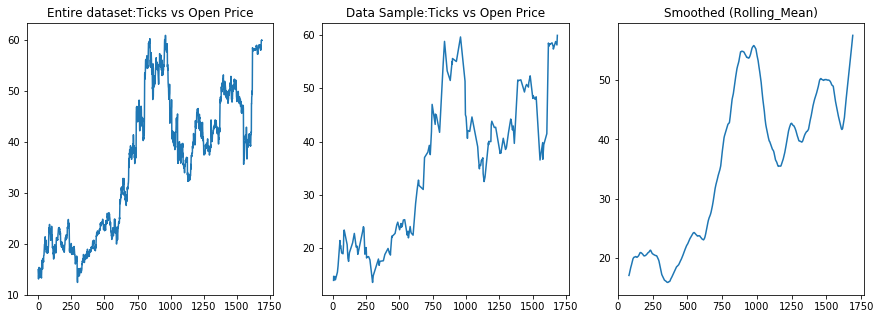

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = Solar_Winds);
axes[0].set_title('Entire dataset:Ticks vs Open Price');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Data Sample:Ticks vs Open Price');
axes[2].plot('Ticks', 'Rolling_Mean', data = Solar_Winds);
axes[2].set_title('Smoothed (Rolling_Mean)');

Entire dataset and smooth (rollig mean) in the same plot

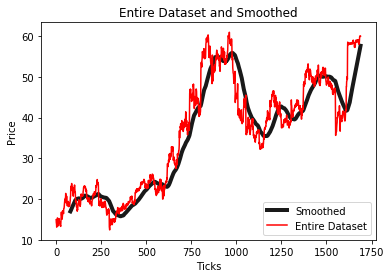

In [29]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(Solar_Winds['Ticks'], Solar_Winds['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(Solar_Winds['Ticks'], Solar_Winds['Open'], color = (1,0,0), label = 'Entire Dataset');
ax.set_title('Entire Dataset and Smoothed')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

Entire dataset and smooth (rollig mean) over time in the same plot 

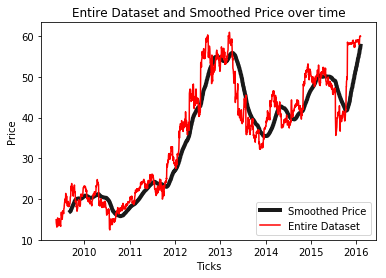

In [30]:
# Same code but with datetime
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(Solar_Winds['Date'], Solar_Winds['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed Price');
ax.plot(Solar_Winds['Date'], Solar_Winds['Open'], color = (1,0,0), label = 'Entire Dataset');
ax.set_title('Entire Dataset and Smoothed Price over time')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [31]:
# Plotting Date works best with datetime as the type. 
type(Solar_Winds['Date'].values[0])

numpy.datetime64

Prepare data for Predictive analysis

In [32]:
filt_Solar_Winds = Solar_Winds[(Solar_Winds['Ticks'] >= 800) & (Solar_Winds['Ticks'] <= 1200)]

In [33]:
filt_Solar_Winds.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
800,2012-07-23,41.24,42.02,40.30,41.63,800,42.765625
801,2012-07-24,41.72,41.94,40.91,41.48,801,42.812125
802,2012-07-25,44.00,50.00,43.00,49.48,802,42.877250
803,2012-07-26,51.39,53.11,51.24,52.91,803,43.036375
804,2012-07-27,53.34,53.97,52.58,53.44,804,43.212125


Initiate linear regression calculation

In [34]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression().fit(filt_Solar_Winds[['Ticks']], filt_Solar_Winds[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
#print 'y = ', round(m[0],2), 'x + ', round(b[0],2) ~ get invalid syntax error so it didn't print go back and check on syntax 
# using the equation of the line to get y values
predicted_prices = model.predict(filt_Solar_Winds[['Ticks']])
predicted_prices[0:5]


array([[ 56.27031624],
       [ 56.22325788],
       [ 56.17619951],
       [ 56.12914115],
       [ 56.08208278]])

In [41]:

# DataFrame for the predictions
predicted_prices = pd.DataFrame(data = predicted_prices, index = filt_Solar_Winds.index.values, columns = ['Predicted Prices'])
predicted_prices.head()

,Predicted Prices
800,56.270316
801,56.223258
802,56.176200
803,56.129141
804,56.082083


Join both Dataframes

In [43]:

# join and concat documentation
# http://pandas.pydata.org/pandas-docs/stable/merging.html

joined_df = filt_Solar_Winds.join(predicted_prices, how = 'inner')
joined_df.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean,Predicted Prices
800,2012-07-23,41.24,42.02,40.30,41.63,800,42.765625,56.270316
801,2012-07-24,41.72,41.94,40.91,41.48,801,42.812125,56.223258
802,2012-07-25,44.00,50.00,43.00,49.48,802,42.877250,56.176200
803,2012-07-26,51.39,53.11,51.24,52.91,803,43.036375,56.129141
804,2012-07-27,53.34,53.97,52.58,53.44,804,43.212125,56.082083


Plot Predicted values and Smooth Price

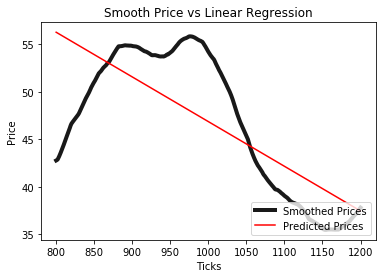

In [45]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(joined_df['Ticks'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed Prices');
ax.plot(joined_df['Ticks'], joined_df['Predicted Prices'], color = (1,0,0), label = 'Predicted Prices');
ax.set_title('Smooth Price vs Linear Regression')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [47]:
# documentation 
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html+
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'],joined_df['Predicted Prices'],multioutput='uniform_average')
r_squared

0.54473270545879138